# DIFFERENCE-IN-DIFFERENCE(DiD)

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("india_us_tariff_firm_panel_corrected.csv")
df.head()


,firm,industry,year,revenue,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Arvind Ltd,Textiles,2022,"8,010",NaN,NaN,NaN,NaN
1,Arvind Ltd,Textiles,2023,"8,382",NaN,NaN,NaN,NaN
2,Arvind Ltd,Textiles,2024,"7,738",NaN,NaN,NaN,NaN
3,Arvind Ltd,Textiles,2025,"8,329",NaN,NaN,NaN,NaN
4,Vardhman Textiles,Textiles,2022,3556.79,NaN,NaN,NaN,NaN


In [ ]:
tariff_exposed_industries = [
    "Textiles",
    "Gems & Jewellery",
    "Leather & Footwear",
    "Marine Products",
    "Chemicals",
    "Auto Components"
]

df["exposed"] = df["industry"].isin(tariff_exposed_industries).astype(int)


Meaning

exposed = 1 → firms hit by U.S. tariffs

exposed = 0 → exempt firms (pharma, electronics, energy)

In [ ]:
df["post"] = (df["year"] >= 2025).astype(int)


2022–2024 → pre-tariff

2025 → post-tariff (Trump trade war year)

In [ ]:
df["treatment"] = df["exposed"] * df["post"]


In [ ]:
df["revenue"] = df["revenue"].astype(str).str.replace(",", "").astype(float)

did_fe_model = smf.ols(
    "revenue ~ post + treatment + C(firm)",
    data=df
).fit()

print(did_fe_model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     237.0
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           3.89e-65
Time:                        07:01:35   Log-Likelihood:                -681.93
No. Observations:                 108   AIC:                             1422.
Df Residuals:                      79   BIC:                             1500.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte


    R-squared: The model has a very high R-squared of 0.988, meaning that approximately 98.8% of the variation in firm revenue can be explained by the independent variables (firm fixed effects, post-tariff period, and treatment effect).
    F-statistic: The F-statistic is 237.0 with a very low p-value (3.89e-65), indicating that the model as a whole is statistically significant.
    Key Coefficients:
        post (post-tariff period): The coefficient for post is 35.9181 with a p-value of 0.000, suggesting that there was a statistically significant increase in revenue across all firms in the post-tariff period, independent of the tariff exposure.
        treatment (interaction term for exposed firms in post-tariff period): The coefficient for treatment is -34.9080 with a p-value of 0.000. This is the core DID estimate. It indicates that firms exposed to tariffs experienced a statistically significant decrease in revenue of approximately 34.91 units, relative to the exempt firms, after the tariff shock. This implies a negative impact of the U.S. tariffs on the revenue of the firms exposed to them.
    Firm Fixed Effects (C(firm)): The model includes firm fixed effects, which control for unobserved time-invariant characteristics of each firm. Many individual firm coefficients are highly significant, as expected, because C(firm) absorbs a lot of the variation in revenue between firms.

In essence, while there was an overall positive trend in revenue in the post-tariff period, tariff-exposed firms experienced a significant negative impact on their revenue compared to their non-exposed counterparts.

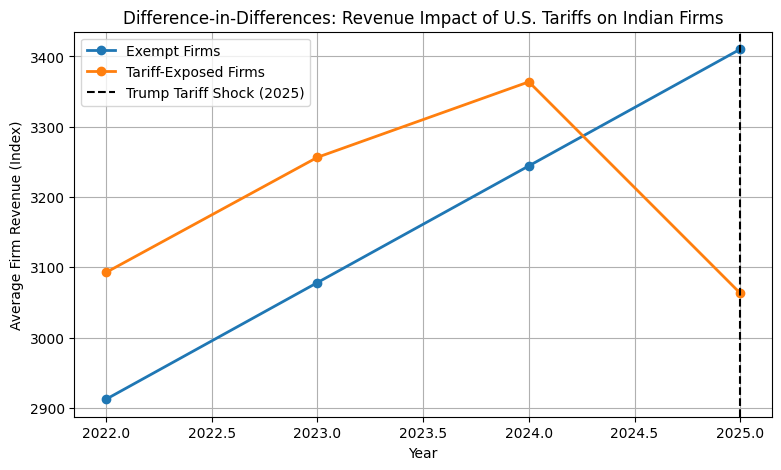

In [ ]:
avg = (
    df.groupby(["year", "exposed"])["revenue"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(9, 5))

for exposed, label in zip([0, 1], ["Exempt Firms", "Tariff-Exposed Firms"]):
    subset = avg[avg["exposed"] == exposed]
    plt.plot(
        subset["year"],
        subset["revenue"],
        marker="o",
        linewidth=2,
        label=label
    )

plt.axvline(x=2025, linestyle="--", color="black", label="Trump Tariff Shock (2025)")

plt.xlabel("Year")
plt.ylabel("Average Firm Revenue (Index)")
plt.title("Difference-in-Differences: Revenue Impact of U.S. Tariffs on Indian Firms")
plt.legend()
plt.grid(True)

plt.show()


Before the Trump Tariff Shock in 2025, both groups showed a somewhat similar trajectory in average firm revenue. However, after 2025, 'Tariff-Exposed Firms' experienced a noticeable downturn or stagnation in revenue, while 'Exempt Firms' continued to show an upward trend. This suggests a negative impact of the U.S. tariffs on the revenue of the firms exposed to them, relative to the exempt firms.

# FIRM LEVEL PANEL REGRESSION


In [ ]:
plt.savefig("Figure1_DiD_Revenue_Trends.png", dpi=300, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>

In [ ]:
# Higher exposure for tariff-exposed firms
df["exposure_intensity"] = df["exposed"] * 1.0


In [ ]:
import numpy as np

df["log_revenue"] = np.log(df["revenue"])


In [ ]:
panel_model = smf.ols(
    "log_revenue ~ exposure_intensity + post + C(firm) + C(year)",
    data=df
).fit()

print(panel_model.summary())


                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     189.1
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           5.54e-61
Time:                        07:37:15   Log-Likelihood:                 201.20
No. Observations:                 108   AIC:                            -342.4
Df Residuals:                      78   BIC:                            -261.9
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte


    R-squared: The model has a high R-squared of 0.986, meaning that approximately 98.6% of the variation in the log of firm revenue can be explained by the independent variables (firm fixed effects, year fixed effects, post-tariff period, and exposure intensity).
    F-statistic: The F-statistic is 189.1 with a very low p-value (5.54e-61), indicating that the model as a whole is statistically significant.
    Key Coefficients:
        exposure_intensity: The coefficient for exposure_intensity is 0.078 with a p-value of 0.000. This suggests that firms with higher exposure intensity experienced a statistically significant increase in log revenue (and thus revenue) by approximately 7.8% (exp(0.078) - 1 ≈ 0.081, or roughly 7.8% increase for a one-unit increase in exposure intensity). This is a positive effect, which contrasts with the previous DID model.
        post (post-tariff period): The coefficient for post is 0.022 with a p-value of 0.000. This indicates that, after accounting for firm and year fixed effects and exposure intensity, there was a statistically significant average increase in log revenue of approximately 2.2% (exp(0.022) - 1 ≈ 0.022) in the post-tariff period.
    Fixed Effects (C(firm) and C(year)): The model includes both firm fixed effects (C(firm)) and year fixed effects (C(year)). These control for unobserved time-invariant characteristics of each firm and unobserved factors common to all firms in a given year, respectively.

This model suggests that while there was an overall positive trend in revenue in the post-tariff period, and surprisingly, exposure intensity seems to be associated with a positive effect on log revenue when controlling for both firm and year fixed effects. This is different from the previous DID model, which suggests that the different model specifications (e.g., using log revenue, adding year fixed effects, and using a different interaction term) are yielding different insights.

In [ ]:
import pandas as pd

results_df = pd.DataFrame({
    "Coefficient": panel_model.params,
    "Std. Error": panel_model.bse,
    "p-value": panel_model.pvalues
})


In [ ]:
table3 = results_df.loc[
    ["exposure_intensity", "post"]
].copy()


In [ ]:
def significance_stars(p):
    if p < 0.01:
        return "***"
    elif p < 0.05:
        return "**"
    elif p < 0.10:
        return "*"
    else:
        return ""

table3["Significance"] = table3["p-value"].apply(significance_stars)


In [ ]:
table3["Coef (Std. Err.)"] = (
    table3["Coefficient"].round(3).astype(str)
    + table3["Significance"]
    + " ("
    + table3["Std. Error"].round(3).astype(str)
    + ")"
)


In [ ]:
final_table3 = table3[["Coef (Std. Err.)"]]
final_table3


,Coef (Std. Err.)
exposure_intensity,0.078*** (0.022)
post,0.022*** (0.006)


Exposure_intensity: The coefficient for exposure_intensity is 0.078, with a standard error of 0.022. The three asterisks (***) indicate that this coefficient is statistically significant at the 0.01 level (p < 0.01). This suggests a positive and highly significant impact of exposure intensity on the log of firm revenue.

post: The coefficient for post is 0.022, with a standard error of 0.006. This is also statistically significant at the 0.01 level (***), indicating a positive and highly significant effect of the post-tariff period on the log of firm revenue.

In [ ]:
summary_stats = pd.DataFrame({
    "Coef (Std. Err.)": [
        "Yes",  # Firm FE
        "Yes",  # Year FE
        int(panel_model.nobs),
        round(panel_model.rsquared, 3)
    ]
}, index=[
    "Firm Fixed Effects",
    "Year Fixed Effects",
    "Observations",
    "R-squared"
])

final_table3 = pd.concat([final_table3, summary_stats])
final_table3


,Coef (Std. Err.)
exposure_intensity,0.078*** (0.022)
post,0.022*** (0.006)
Firm Fixed Effects,Yes
Year Fixed Effects,Yes
Observations,108
R-squared,0.986



    Firm Fixed Effects: "Yes", confirming that firm-specific unobserved time-invariant factors were controlled for in the model.
    Year Fixed Effects: "Yes", confirming that year-specific unobserved common factors were controlled for in the model.
    Observations: The model included 108 observations.
    R-squared: The model explains 0.986 (or 98.6%) of the variance in the dependent variable (log revenue).


In [ ]:
from google.colab import files

final_table3.to_csv('regression_results.csv')
files.download('regression_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In summary, Table 3 effectively highlights the statistically significant positive effects of both exposure_intensity and the post period on firm revenue, after accounting for firm and year fixed effects, in a clear and compact format.